In [53]:
import pandas as pd

In [54]:
import kagglehub
path = kagglehub.dataset_download("susanta21/canteen-shop-transaction-data")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\yania\.cache\kagglehub\datasets\susanta21\canteen-shop-transaction-data\versions\1


In [55]:
menu = pd.read_csv("Restaurant_Orders/menu_items.csv")
print(menu.head())

order_details = pd.read_csv("Restaurant_Orders/order_details.csv")
print(order_details.head())

   menu_item_id      item_name  category  price
0           101      Hamburger  American  12.95
1           102   Cheeseburger  American  13.95
2           103        Hot Dog  American   9.00
3           104  Veggie Burger  American  10.50
4           105   Mac & Cheese  American   7.00
   order_details_id  order_id order_date   order_time  item_id
0                 1         1     1/1/23  11:38:36 AM    109.0
1                 2         2     1/1/23  11:57:40 AM    108.0
2                 3         2     1/1/23  11:57:40 AM    124.0
3                 4         2     1/1/23  11:57:40 AM    117.0
4                 5         2     1/1/23  11:57:40 AM    129.0


In [56]:
print(menu.info())
print(order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB
None


In [57]:
print(menu.isnull().sum())
print(order_details.isnull().sum())

menu_item_id    0
item_name       0
category        0
price           0
dtype: int64
order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64


In [58]:
menu["item_id"] = menu["menu_item_id"]
menu.head()

,menu_item_id,item_name,category,price,item_id
0,101,Hamburger,American,12.95,101
1,102,Cheeseburger,American,13.95,102
2,103,Hot Dog,American,9.00,103
3,104,Veggie Burger,American,10.50,104
4,105,Mac & Cheese,American,7.00,105


In [59]:
merged_df = pd.merge(order_details, menu, on="item_id", how="left")
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109.0,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108.0,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124.0,124.0,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117.0,117.0,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129.0,129.0,Mushroom Ravioli,Italian,15.50


In [60]:
empty_orders = merged_df[merged_df["item_id"].isnull()]
merged_df.dropna(inplace=True)
merged_df.isnull().sum()

order_details_id    0
order_id            0
order_date          0
order_time          0
item_id             0
menu_item_id        0
item_name           0
category            0
price               0
dtype: int64

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format = 'mixed')
print(f' date data type: ',{type(merged_df["order_date"][1])})


 date data type:  {<class 'pandas._libs.tslibs.timestamps.Timestamp'>}


In [63]:
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'], format = 'mixed').dt.time
print(f' time data type: ',{type(merged_df["order_time"][1])})

 time data type:  {<class 'datetime.time'>}


In [64]:
merged_df['time_seconds'] = merged_df['order_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [65]:
'''merged_df['time_bucket'] =merged_df['time_seconds'].apply(
    lambda x: 'Breakfast' if 6 * 3600 <= x < 11 * 3600 else
              'Lunch' if 11 * 3600 <= x < 16 * 3600 else
              'Evening' if 16 * 3600 <= x < 20 * 3600 else
              'Night'
)
print(merged_df['time_bucket'].value_counts())'''

"merged_df['time_bucket'] =merged_df['time_seconds'].apply(\n    lambda x: 'Breakfast' if 6 * 3600 <= x < 11 * 3600 else\n              'Lunch' if 11 * 3600 <= x < 16 * 3600 else\n              'Evening' if 16 * 3600 <= x < 20 * 3600 else\n              'Night'\n)\nprint(merged_df['time_bucket'].value_counts())"

In [69]:
merged_df['time_bucket'] =merged_df['time_seconds'].apply(
    lambda x: '0:00-1:00' if x <= 1 * 3600 else
            '1:00-2:00' if 1 * 3600 < x <= 2 * 3600 else
            '2:00-3:00' if 2 * 3600 < x <= 3 * 3600 else
            '3:00-4:00' if 3 * 3600 < x <= 4 * 3600 else
            '4:00-5:00' if 4 * 3600 < x <= 5 * 3600 else
            '5:00-6:00' if 5 * 3600 < x <= 6 * 3600 else
            '6:00-7:00' if 6 * 3600 < x <= 7 * 3600 else
            '7:00-8:00' if 7 * 3600 < x <= 8 * 3600 else
            '8:00-9:00' if 8 * 3600 < x <= 9 * 3600 else
            '9:00-10:00' if 9 * 3600 < x <= 10 * 3600 else
            '10:00-11:00' if 10 * 3600 < x <= 11 * 3600 else
            '11:00-12:00' if 11 * 3600 < x <= 12 * 3600 else
            '12:00-13:00' if 12 * 3600 < x <= 13 * 3600 else
            '13:00-14:00' if 13 * 3600 < x <= 14 * 3600 else
            '14:00-15:00' if 14 * 3600 < x <= 15 * 3600 else
            '15:00-16:00' if 15 * 3600 < x <= 16 * 3600 else
            '16:00-17:00' if 16 * 3600 < x <= 17 * 3600 else
            '17:00-18:00' if 17 * 3600 < x <= 18 * 3600 else
            '18:00-19:00' if 18 * 3600 < x <= 19 * 3600 else
            '19:00-20:00' if 19 * 3600 < x <= 20 * 3600 else
            '20:00-21:00' if 20 * 3600 < x <= 21 * 3600 else
            '21:00-22:00' if 21 * 3600 < x <= 22 * 3600 else
            '22:00-23:00' if 22 * 3600 < x <= 23 * 3600 else
            '23:00-24:00'
)
print(merged_df['time_bucket'].value_counts())

time_bucket
12:00-13:00    1658
13:00-14:00    1566
17:00-18:00    1355
18:00-19:00    1293
19:00-20:00    1074
16:00-17:00    1035
14:00-15:00     949
20:00-21:00     879
15:00-16:00     742
11:00-12:00     625
21:00-22:00     600
22:00-23:00     305
23:00-24:00      11
10:00-11:00       5
Name: count, dtype: int64


In [70]:
merged_df[merged_df['time_bucket']== '21:00-22:00']

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price,time_seconds,time_bucket
150,151,65,2023-01-01,21:16:00,112.0,112.0,Salmon Roll,Asian,14.95,76560,21:00-22:00
151,152,65,2023-01-01,21:16:00,120.0,120.0,Steak Torta,Mexican,13.95,76560,21:00-22:00
152,153,65,2023-01-01,21:16:00,122.0,122.0,Chips & Salsa,Mexican,7.00,76560,21:00-22:00
153,154,65,2023-01-01,21:16:00,123.0,123.0,Chips & Guacamole,Mexican,9.00,76560,21:00-22:00
154,155,66,2023-01-01,21:47:55,108.0,108.0,Tofu Pad Thai,Asian,14.50,78475,21:00-22:00
...,...,...,...,...,...,...,...,...,...,...,...
12224,12225,5367,2023-03-31,21:58:06,119.0,119.0,Chicken Torta,Mexican,11.95,79086,21:00-22:00
12225,12226,5368,2023-03-31,21:58:47,101.0,101.0,Hamburger,American,12.95,79127,21:00-22:00
12226,12227,5368,2023-03-31,21:58:47,128.0,128.0,Cheese Lasagna,Italian,15.50,79127,21:00-22:00
12227,12228,5368,2023-03-31,21:58:47,113.0,113.0,Edamame,Asian,5.00,79127,21:00-22:00


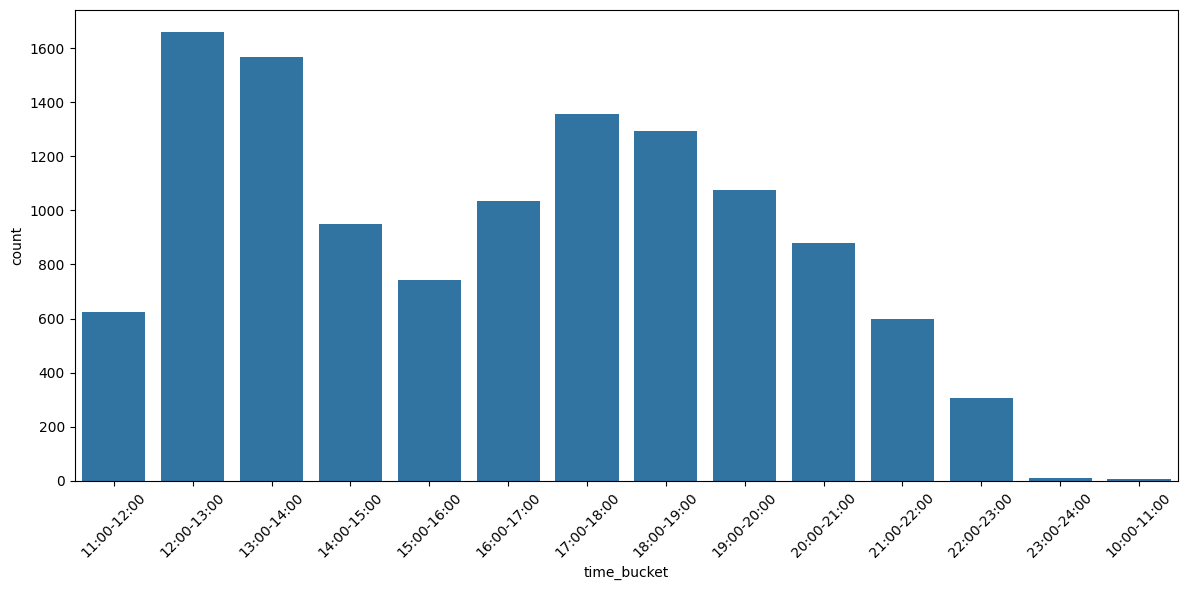

In [73]:
plt.figure(figsize=(12, 6))
plot_df = merged_df[['order_id','time_bucket']]
sns.countplot(data=plot_df, x='time_bucket')
plt.xticks(rotation=45)
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()

0